## Demo of maximum likelihood estimation (MLE)

Consider a sample (of size N) of iid data coming from normal distribution with mean $\mu$ and standard deviation $\sigma$. 

Using this sample, MLE of mean and standard deviation is:
$$
\hat \mu_{MLE} = \overline x = \frac{1}{N} \sum_i x_i
$$
and
$$
\hat \sigma^2_{MLE} = \frac{1}{N} \sum_i (x_i-\overline x)^2
$$

Lets consider normal distributed data with $\mu=2$ and $\sigma=4$

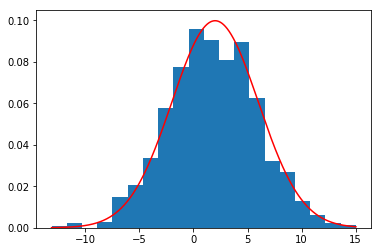

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# sample size
N = 1000

# mean
mu = 2

# covariance
sigma = 4

x = norm.rvs(loc=mu, scale=sigma, size=N)
t = np.arange(min(x),max(x),0.01)
y = norm.pdf(t, loc=mu, scale=sigma)

plt.hist(x, bins=20, density=True);
plt.plot(t,y, color='red');


Given data $x$ the log likelihood is:
$$
\ell(\mu, \sigma) = \log \Pi_i f(x_i) = \sum_i \log f(x_i)
$$

In [15]:
def log_likelihood(x, mu, std):
    llog = np.sum([np.log(norm.pdf(xi, loc=mu, scale=std)) for xi in x])
    return llog 


Lets assume standard deviation is known $\sigma=4$. Lets see the change of log likelihood with different values of $\hat \mu$.

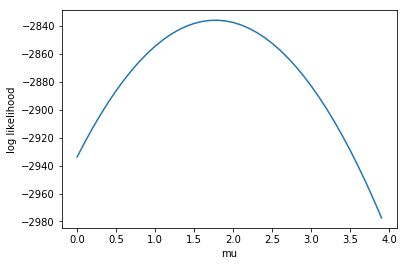

In [26]:
hat_mu = np.arange(0, 4, 0.1)

std = 4
llog = [log_likelihood(x, mu, std) for mu in hat_mu]

plt.plot(hat_mu, llog)
plt.xlabel('mu')
plt.ylabel('log likelihood');

Lets find the MLE of $\mu$ emperically and compare it to the computed value.

In [27]:
# theoretical value
mle_theo = np.mean(x)

# empirical value
ind = np.argmax(llog)
mle_emp = hat_mu[ind]

print(f"Theoretical mu_mle: {mle_theo}  empirical mu_mle: {mle_emp}")



Theoretical mu_mle: 1.7706619278678135  empirical mu_mle: 1.8


Lets assume mean is known $\mu=2$. Lets see the change of log likelihood with different values of $\hat \sigma$.

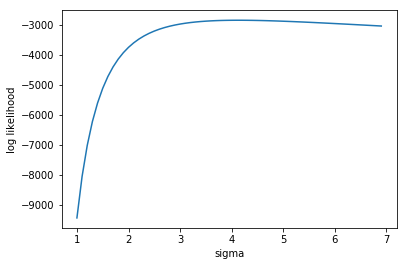

In [29]:
hat_std = np.arange(1, 7, 0.1)

mu = 2
llog = [log_likelihood(x, mu, std) for std in hat_std]

plt.plot(hat_std, llog)
plt.xlabel('sigma')
plt.ylabel('log likelihood');

Lets find the MLE of $\sigma$ emperically and compare it to the computed value.

In [34]:
# theoretical value
mle_theo = np.sqrt(np.mean([(xi-np.mean(x))**2 for xi in x]))

# empirical value
ind = np.argmax(llog)
mle_emp = hat_std[ind]

print(f"Theoretical sigma_mle: {mle_theo:.2f}  empirical sigma_mle: {mle_emp:.2f}")


Theoretical sigma_mle: 4.12  empirical sigma_mle: 4.10


Now lets compute log likelihood in both dimensions ($\mu$ and $\sigma$).



In [37]:
hat_mu = np.arange(0, 4, 0.1)
hat_std = np.arange(1, 7, 0.1)

llog = [[log_likelihood(x, mu, std) for mu in hat_mu] for std in hat_std]

Find maxima of log likelihood for MLE estimates of $\mu$ and $\sigma$.

empirical mean: 1.8 empirical std dev: 4.10


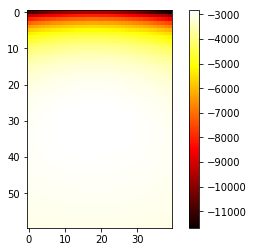

In [58]:
im = plt.imshow(llog, cmap='hot')#, aspect=(cols/rows))
plt.colorbar() ;

ind = np.unravel_index( np.argmax(llog), np.array(llog).shape)
print(f"empirical mean: {hat_mu[ind[1]]} empirical std dev: {hat_std[ind[0]]:.2f}")